<a href="https://colab.research.google.com/github/IslamNiloy/Qiskit-Problem-Solving/blob/main/Qiskit_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name:Niloy Islam
#ID:1821925642

#Installation

In [ ]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 17.9 MB/s 
     |████████████████████████████████| 18.0 MB 286 kB/s 
     |████████████████████████████████| 240 kB 45.9 MB/s 
     |████████████████████████████████| 198 kB 33.1 MB/s 
     |████████████████████████████████| 112 kB 45.1 MB/s 
     |████████████████████████████████| 54 kB 1.3 MB/s 
     |████████████████████████████████| 1.6 MB 50.0 MB/s 
     |████████████████████████████████| 943 kB 52.1 MB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 4.0 MB 44.9 MB/s 
     |████████████████████████████████| 112 kB 65.6 MB/s 
  Created wheel for qiskit: filename=qiskit-0.36.2-py3-none-any.whl size=11933 sha256=be1eabc93

In [ ]:
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 19.3 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=46931119c99b4d51e70656c937f1f2462f357139501935dd55c1172d79423737
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


Importing Libraries

In [ ]:
from qiskit import*
from qiskit.tools.monitor import job_monitor
from  qiskit.tools.visualization import plot_state_qsphere
from qiskit.visualization import plot_histogram,plot_bloch_multivector,array_to_latex

#Question 1
Build a 1-qubit circuit and initialize its state in superposition without using any
gate. Implement proper state vector visualization technique. [Hint: Find the vector
of a superposition state.]

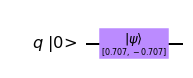

In [ ]:
import numpy as np
initial_state=[1/np.sqrt(2), -1/np.sqrt(2)]
circuit = QuantumCircuit(1)
circuit.initialize(initial_state, 0)
circuit.draw(output='mpl',initial_state=True)

Job Status: job has successfully run


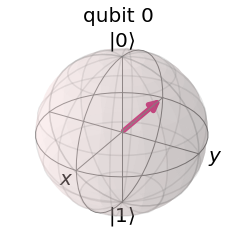

In [ ]:
simulator= Aer.get_backend('aer_simulator')
circuit.save_statevector()
qobj=assemble(circuit)
job=simulator.run(qobj)
job_monitor(job)
result=job.result()
state=result.get_statevector()
plot_bloch_multivector(state)

#Question 2
Create a 3-qubit circuit with the sequence of gates H, X, CCX in such a way that
you always have 50% probability to get state |1> from the target qubit of CCX.
[Hint: apply measurement in a qubit that is in superposition.]

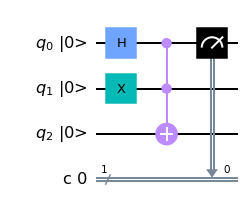

In [ ]:
circuit = QuantumCircuit(3,1)
circuit.h(0)
circuit.x(1)
circuit.ccx(0,1,2)
circuit.measure(0,0)
circuit.draw(output='mpl',initial_state=True)

In [ ]:
simulator = Aer.get_backend('aer_simulator')
circuit.save_statevector()
qobj = assemble(circuit)
job =simulator.run(qobj)
job_monitor(job)
result = job.result()
state = result.get_statevector()
counts=result.get_counts()

Job Status: job has successfully run


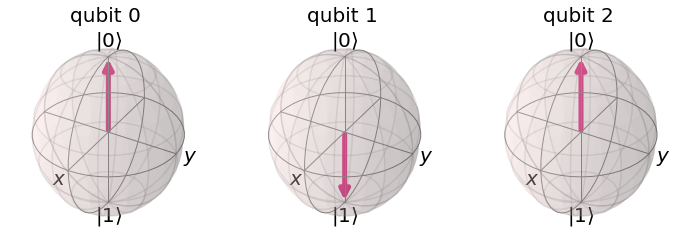

In [ ]:
plot_bloch_multivector(state)

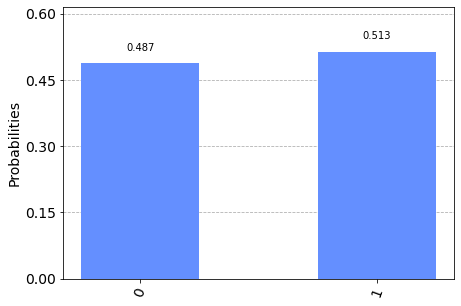

In [ ]:
plot_histogram(counts)

#Question 3
Calculate the single qubit unitary created by the sequence of gates X, Z, H. [Hint:use Aer simulator.]

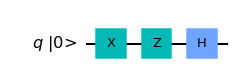

In [ ]:
circuit = QuantumCircuit(1)
circuit.x(0)
circuit.z(0)
circuit.h(0)
circuit.draw(output='mpl',initial_state=True)


In [ ]:
from qiskit.providers.aer.backends import aer_simulator
simulator=Aer.get_backend('aer_simulator')
circuit.save_unitary()
qobj = assemble(circuit)
job = simulator.run(qobj)
job_monitor(job)
result = job.result()
unitary = result.get_unitary()


Job Status: job has successfully run


In [ ]:
print(unitary)

Operator([[-0.70710678+8.65956056e-17j,  0.70710678+0.00000000e+00j],
          [ 0.70710678-8.65956056e-17j,  0.70710678+0.00000000e+00j]],
         input_dims=(2,), output_dims=(2,))


In [ ]:
array_to_latex(unitary)

<IPython.core.display.Latex object>

#Qusetion 4
Create an entanglement circuit with H, CX gate and apply measurement. Run on
both a simulator and real quantum device. Compare the results you obtained by
plotting histograms. [Hint: explain any abnormalities you observe]

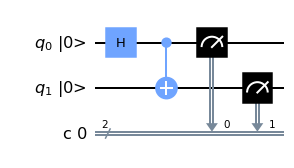

In [ ]:
circuit= QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure(0,0)
circuit.measure(1,1)
circuit.draw(output='mpl',initial_state=True)

In [ ]:
from qiskit.providers.aer.backends import aer_simulator
simulator= Aer.get_backend('aer_simulator')
circuit.save_statevector()
qobj=assemble(circuit)
job=simulator.run(qobj)
job_monitor(job)
result=job.result()
state=result.get_statevector()
counts=result.get_counts()


Job Status: job has successfully run


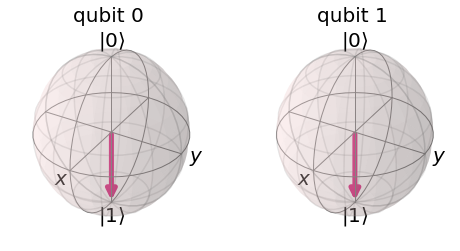

In [ ]:
plot_bloch_multivector(state)

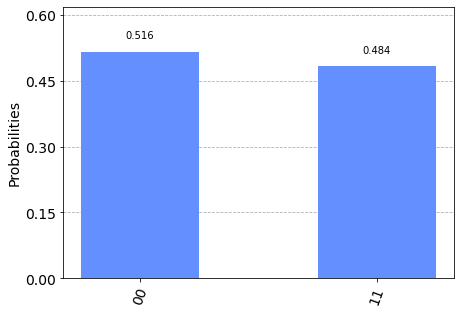

In [ ]:
plot_histogram(counts)

configrc.store_credentials:WARNING:2022-05-12 13:12:54,965: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-05-12 13:12:55,294: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


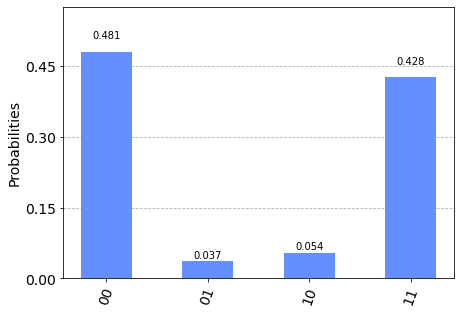

In [ ]:
# Real Quantum Device 
from qiskit import IBMQ
IBMQ.save_account('266667e259870d7e4e80aad2bf20166a780d1c5f7924958a69f77d709f1515d9210e8630099c242899cbf8ced00f48d84ec8aeaf9a3847cb208d74fdb24b89e1')
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomp=provider.get_backend('ibmq_belem')
job=execute(circuit,backend=qcomp)
job_monitor(job)
result=job.result()
counts=result.get_counts()
plot_histogram(counts)

#Explaination:
Here both results are different. In simulator we see 00 and 11 but in quantum device we notice that 01 and 10 also show some probabilities which is not possible. This is happening because of quantum error. Real Quantum devices aren't much developed that's why there's some quantum error.

#Question 5
Show Heisenberg uncertainty principle in action for X, Y and Z basis
measurement. [Hint: session 4]

A. Initialize a state in X basis and measure in X basis.

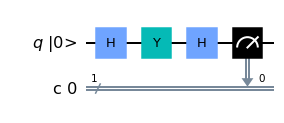

In [ ]:
#initialize in X basis
circuit=QuantumCircuit(1,1) 
circuit.h(0)
circuit.y(0)

#measure in X Basis
circuit.h(0)
circuit.measure(0,0)
circuit.draw(output='mpl',initial_state=True)

Job Status: job has successfully run


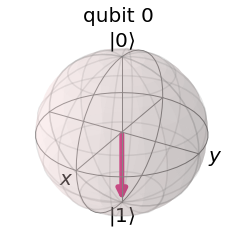

In [ ]:
simulator= Aer.get_backend('aer_simulator')
circuit.save_statevector()
qobj=assemble(circuit)
job=simulator.run(qobj)
job_monitor(job)
result=job.result()
state=result.get_statevector()
plot_bloch_multivector(state)

Initialize a state in X basis and measure in y basis.

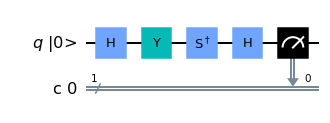

In [ ]:
#initialize in X basis
circuit=QuantumCircuit(1,1) 
circuit.h(0)
circuit.y(0)

#measure in Y Basis
circuit.sdg(0)
circuit.h(0)
circuit.measure(0,0)
circuit.draw(output='mpl',initial_state=True)

Job Status: job has successfully run


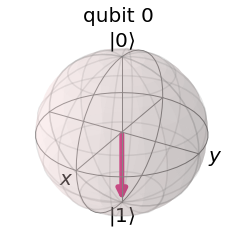

In [ ]:
simulator= Aer.get_backend('aer_simulator')
circuit.save_statevector()
qobj=assemble(circuit)
job=simulator.run(qobj)
job_monitor(job)
result=job.result()
final_state=result.get_statevector()
plot_bloch_multivector(final_state)

Initialize a state in X basis and measure in Z basis.

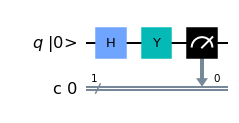

In [ ]:
#initialize in X basis
circuit=QuantumCircuit(1,1) 
circuit.h(0)
circuit.y(0)

#measure in Z Basis
circuit.measure(0,0)
circuit.draw(output='mpl',initial_state=True)

Job Status: job has successfully run


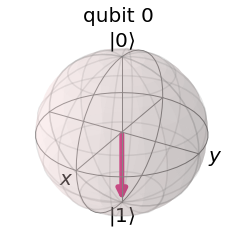

In [ ]:
simulator= Aer.get_backend('aer_simulator')
circuit.save_statevector()
qobj=assemble(circuit)
job=simulator.run(qobj)
job_monitor(job)
result=job.result()
final_state=result.get_statevector()
plot_bloch_multivector(final_state)

B. Initialize a state in Y basis and measure in X basis.

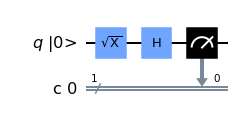

In [ ]:
#initialize in Y basis
circuit=QuantumCircuit(1,1) 
circuit.sx(0)


#measure in X Basis
circuit.h(0)
circuit.measure(0,0)
circuit.draw(output='mpl',initial_state=True)

Job Status: job has successfully run


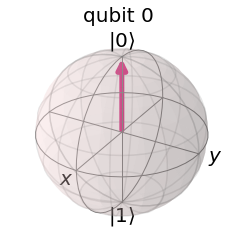

In [ ]:
simulator= Aer.get_backend('aer_simulator')
circuit.save_statevector()
qobj=assemble(circuit)
job=simulator.run(qobj)
job_monitor(job)
result=job.result()
final_state=result.get_statevector()
plot_bloch_multivector(final_state)

Initialize a state in Y basis and measure in Y basis.

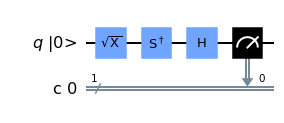

In [ ]:
#initialize in Y basis
circuit=QuantumCircuit(1,1) 
circuit.sx(0)


#measure in Y Basis
circuit.sdg(0)
circuit.h(0)
circuit.measure(0,0)
circuit.draw(output='mpl',initial_state=True)

Job Status: job has successfully run


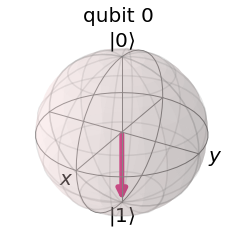

In [ ]:
simulator= Aer.get_backend('aer_simulator')
circuit.save_statevector()
qobj=assemble(circuit)
job=simulator.run(qobj)
job_monitor(job)
result=job.result()
final_state=result.get_statevector()
plot_bloch_multivector(final_state)

Initialize a state in Y basis and measure in Z basis.

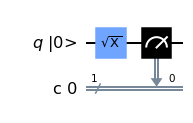

In [ ]:
#initialize in Y basis
circuit=QuantumCircuit(1,1) 
circuit.sx(0)

#measure in Z Basis
circuit.measure(0,0)
circuit.draw(output='mpl',initial_state=True)

Job Status: job has successfully run


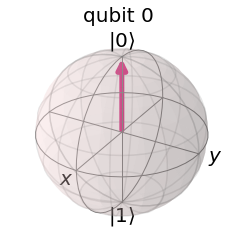

In [ ]:
simulator= Aer.get_backend('aer_simulator')
circuit.save_statevector()
qobj=assemble(circuit)
job=simulator.run(qobj)
job_monitor(job)
result=job.result()
final_state=result.get_statevector()
plot_bloch_multivector(final_state)

C. Initialize a state in Z basis and measure in X basis.

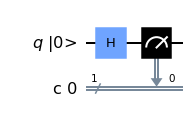

In [ ]:
#initialize in Z basis
circuit=QuantumCircuit(1,1) 

#measure in X Basis
circuit.h(0)
circuit.measure(0,0)
circuit.draw(output='mpl',initial_state=True)

Job Status: job has successfully run


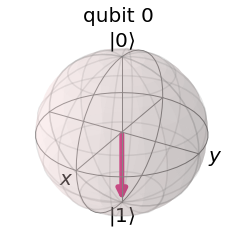

In [ ]:
simulator= Aer.get_backend('aer_simulator')
circuit.save_statevector()
qobj=assemble(circuit)
job=simulator.run(qobj)
job_monitor(job)
result=job.result()
final_state=result.get_statevector()
plot_bloch_multivector(final_state)

 Initialize a state in Z basis and measure in Y basis.

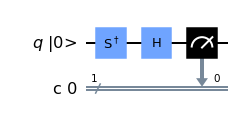

In [ ]:
#initialize in Z basis
circuit=QuantumCircuit(1,1) 

#measure in Y Basis
circuit.sdg(0)
circuit.h(0)
circuit.measure(0,0)
circuit.draw(output='mpl',initial_state=True)

Job Status: job has successfully run


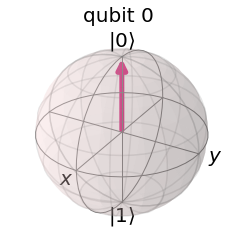

In [ ]:
simulator= Aer.get_backend('aer_simulator')
circuit.save_statevector()
qobj=assemble(circuit)
job=simulator.run(qobj)
job_monitor(job)
result=job.result()
final_state=result.get_statevector()
plot_bloch_multivector(final_state)

Initialize a state in Z basis and measure in Z basis.

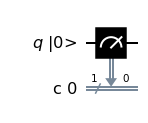

In [ ]:
#initialize in Z basis
circuit=QuantumCircuit(1,1) 

#measure in Z Basis
circuit.measure(0,0)
circuit.draw(output='mpl',initial_state=True)

Job Status: job has successfully run


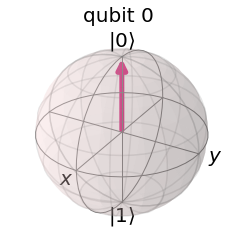

In [ ]:
simulator= Aer.get_backend('aer_simulator')
circuit.save_statevector()
qobj=assemble(circuit)
job=simulator.run(qobj)
job_monitor(job)
result=job.result()
final_state=result.get_statevector()
plot_bloch_multivector(final_state)

#Explaination:
If we initialized & measure in same basis the outcome will certain But if we initialized in one basis & measure in another basis the outcome will random. ->Heisenberg uncertainty principle.